In [1]:
# import packages
import numpy as np
from scipy import stats
from statsmodels.nonparametric.kde import KDEUnivariate
# dirty local imports:
import sys
sys.path.append("./../../../")
from share_code.utils import plt, sns, my_saving_display
from joblib import Memory
import scipy as sp

# cachedir = './joblib_cache/'
# memory = Memory(cachedir=cachedir, verbose=1)

sns.set_palette("colorblind")

In [2]:
# to get images in the notebook
%matplotlib inline 

In [3]:
dirname = "../prebuiltimages/"
imageformat = ".pdf"  # should be .pdf or .png    
# some colors I'll use
brown = (0.64, 0.16, 0.16)
purple = (148. / 255, 0, 211. / 255)
plt.close("all")
saving = False  # True

In [4]:
# import seaborn as sns
# sns.set_palette("colorblind")
# sns.set_style("ticks")
color_blind_list = sns.color_palette("GnBu_d", 8)
c1 = color_blind_list[0]
c2 = color_blind_list[1]
c3 = color_blind_list[2]

In [5]:
x = np.linspace(-4, 4, 500)


def huber_conco(x, threshold=2.5):
    """Huber function for concomitant."""
    z = np.abs(x)
    test = np.abs(x) <= threshold
    z[test] = x[test] ** 2 / (2 * threshold) + threshold / 2
    return z


def huber_ori(x, threshold):
    """Original Huber function."""
    z = x ** 2 / (2 * threshold)
    test = np.abs(x) > threshold
    z[test] = np.abs(x)[test] - threshold / 2
    return z


def huber_weights(x, threshold):
    """Normalized weights (max=1) for the original Huber function."""
    z = threshold / np.abs(x)
    test = np.abs(x) < threshold
    z[test] = 1
    return z


def huber_ori_prime(x, threshold):
    """Original Huber function derivative."""
    z = x / (threshold)
    test = np.abs(x) > threshold
    z[test] = np.sign(x)[test]
    return z


def bisquare(x, threshold):
    """Bi-square function."""
    z = 1 - (1 - (x / threshold)**2)**3
    test = np.abs(x) > threshold
    z[test] = 1
    return z


def bisquare_prime(x, threshold):
    """Bi-square function derivative."""
    z = 6 * x * (1 - (x / threshold)**2)**2 / threshold ** 2
    test = np.abs(x) > threshold
    z[test] = 0
    return z


def bisquare_weights(x, threshold):
    """Bi-square function derivative."""
    z = (1 - (x / threshold)**2)**2
    test = np.abs(x) > threshold
    z[test] = 0
    return z


def bisquare_weights_scale(x, threshold):
    """Bi-square function normalized weights (max=1)."""
    z = 1 / x**2
    y = (1 - (1 - (x / threshold)**2)**3) / x**2  # 3-3*x**2+x**4
    return np.minimum(y, z)


def compute_contamination(threshold):
    """...."""
    eps = 1. - 1. / (stats.norm.cdf(threshold) - stats.norm.cdf(-threshold)
                     + 2 * stats.norm.pdf(threshold) / threshold)

    return eps


def optimal_distribution(x, threshold):
    """...."""
    eps = compute_contamination(threshold)
    z = (1 - eps) * stats.norm.pdf(x)
    test = x > threshold
    z[test] = (1 - eps) * stats.norm.pdf(threshold) * \
        np.exp(-threshold * (x[test] - threshold))
    test2 = x < - threshold
    z[test2] = (1 - eps) * stats.norm.pdf(-threshold) * \
        np.exp(threshold * (x[test2] + threshold))
    return z


def worst_corruption(x, threshold):
    """...."""
    eps = compute_contamination(threshold)
    z = optimal_distribution(x, threshold) - (1 - eps) * stats.norm.pdf(x)
    return z / eps


def plot_data_statistics(x, function, threshold, figname, ylims=[-1, 5], xlims=[-4, 4], derivate=False,
                         name=r'$\rho_\alpha$,'):

    fig1, ax = plt.subplots(figsize=(5, 5))
    if derivate is False:
        ax.plot(x, np.abs(x), 'k-', lw=2, label=r'$|\cdot|$')
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ax.plot(x, function(x, threshold), c=c3, lw=1.7,
            label=name + r' $\alpha= {:.1f}$'.format(threshold))

    plt.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

    if saving:
        my_saving_display(fig1, dirname, figname, imageformat)

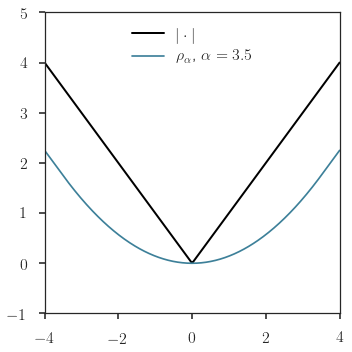

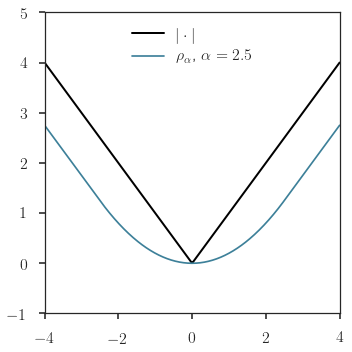

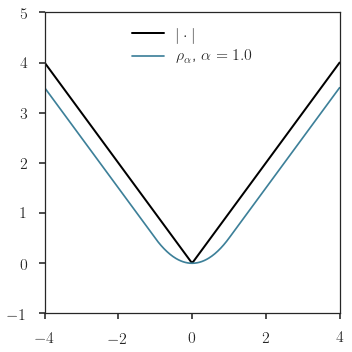

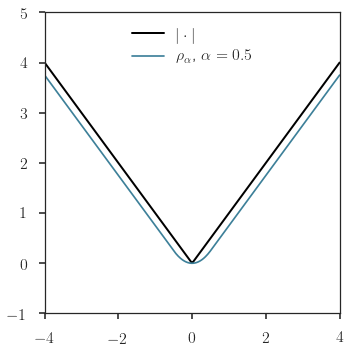

In [6]:
plot_data_statistics(x, huber_ori, 3.5, "Huber_usual3pt5")
plot_data_statistics(x, huber_ori, 2.5, "Huber_usual2pt5")
plot_data_statistics(x, huber_ori, 1.0, "Huber_usual1pt0")
plot_data_statistics(x, huber_ori, 0.5, "Huber_usual0pt5")

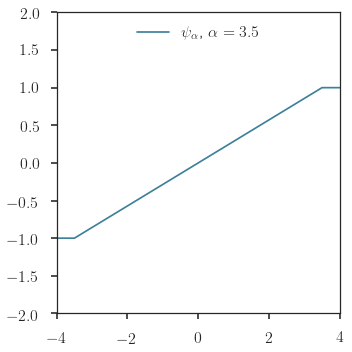

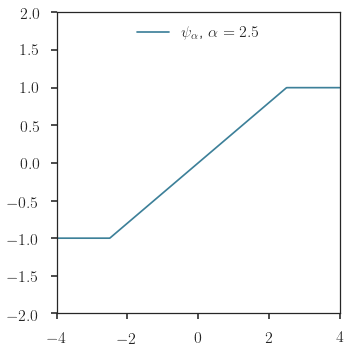

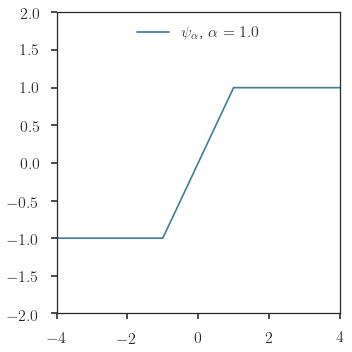

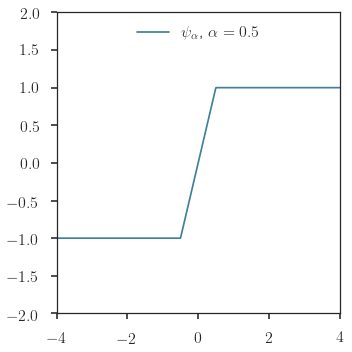

In [7]:
plot_data_statistics(x, huber_ori_prime, 3.5, "Huber_usual_prime3pt5",
                     ylims=[-2, 2], derivate=True, name=r'$\psi_\alpha$,')
plot_data_statistics(x, huber_ori_prime, 2.5, "Huber_usual_prime2pt5",
                     ylims=[-2, 2], derivate=True, name=r'$\psi_\alpha$,')
plot_data_statistics(x, huber_ori_prime, 1.0, "Huber_usual_prime1pt0",
                     ylims=[-2, 2], derivate=True, name=r'$\psi_\alpha$,')
plot_data_statistics(x, huber_ori_prime, 0.5, "Huber_usual_prime0pt5",
                     ylims=[-2, 2], derivate=True, name=r'$\psi_\alpha$,')

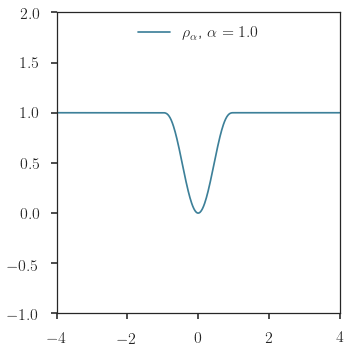

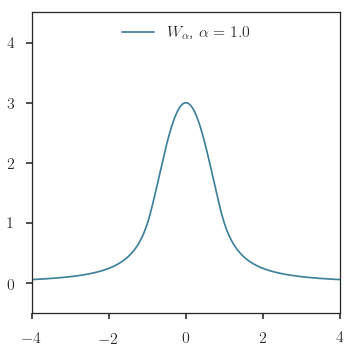

In [8]:
plot_data_statistics(x, bisquare, 1., "Bisquare1pt0bis",
                     ylims=[-1, 2], derivate=True, name=r'$\rho_\alpha$,')
plot_data_statistics(x, bisquare_weights_scale, 1., "Bisquare_weight_scale1pt0",
                     ylims=[-0.5,4.5], derivate=True, name=r'$W_\alpha$,')


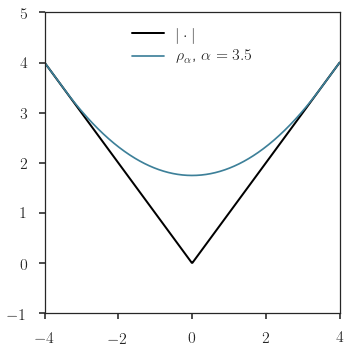

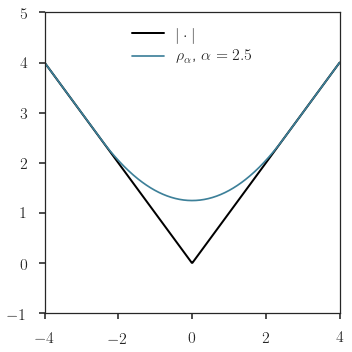

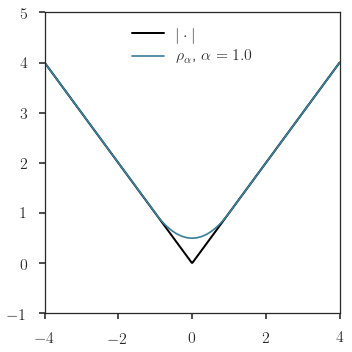

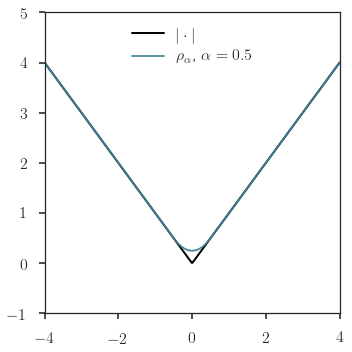

In [9]:

plot_data_statistics(x, huber_conco, 3.5 , "Huber_conco3pt5")
plot_data_statistics(x, huber_conco, 2.5 , "Huber_conco2pt5")
plot_data_statistics(x, huber_conco, 1.0 , "Huber_conco1pt0")
plot_data_statistics(x, huber_conco, 0.5 , "Huber_conco0pt5")

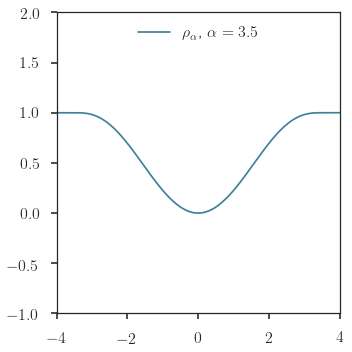

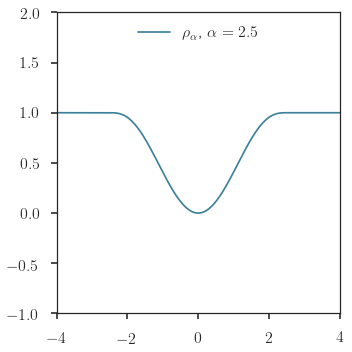

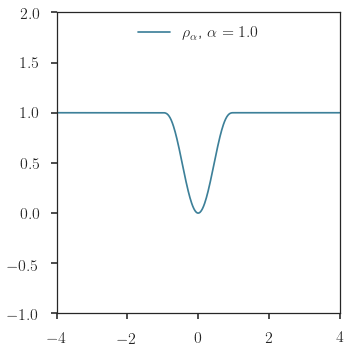

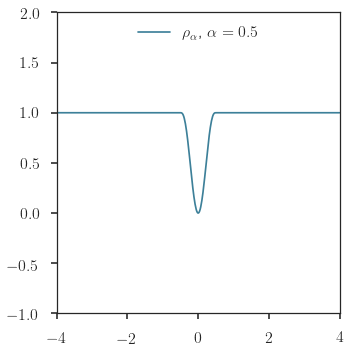

In [10]:
plot_data_statistics(x, bisquare, 3.5, "Bisquare3pt5",
                     ylims=[-1, 2], derivate=True, name=r'$\rho_\alpha$,')
plot_data_statistics(x, bisquare, 2.5, "Bisquare2pt5",
                     ylims=[-1, 2], derivate=True, name=r'$\rho_\alpha$,')
plot_data_statistics(x, bisquare, 1.0, "Bisquare1pt0",
                     ylims=[-1, 2], derivate=True, name=r'$\rho_\alpha$,')
plot_data_statistics(x, bisquare, 0.5, "Bisquare0pt5",
                     ylims=[-1, 2], derivate=True, name=r'$\rho_\alpha$,')

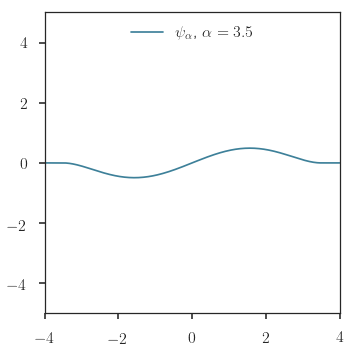

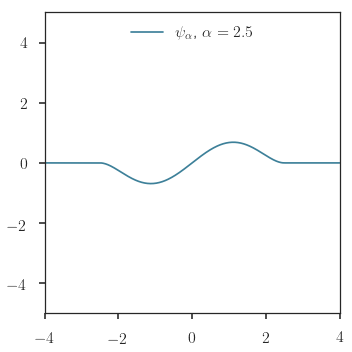

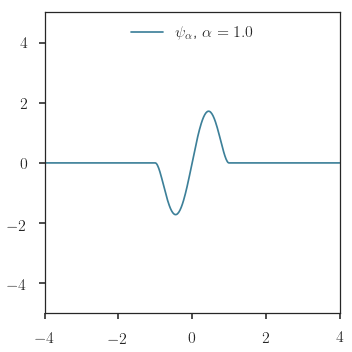

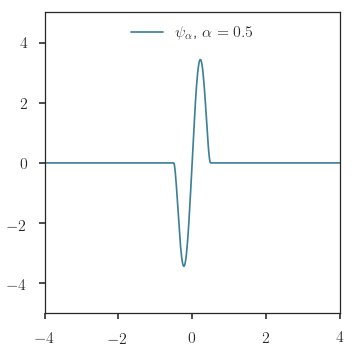

In [11]:
plot_data_statistics(x, bisquare_prime, 3.5, "Bisquare_prime3pt5",
                     ylims=[-5, 5], derivate=True, name=r'$\psi_\alpha$,')
plot_data_statistics(x, bisquare_prime, 2.5, "Bisquare_prime2pt5",
                     ylims=[-5, 5], derivate=True, name=r'$\psi_\alpha$,')
plot_data_statistics(x, bisquare_prime, 1.0, "Bisquare_prime1pt0",
                     ylims=[-5, 5], derivate=True, name=r'$\psi_\alpha$,')
plot_data_statistics(x, bisquare_prime, 0.5, "Bisquare_prime0pt5",
                     ylims=[-5, 5], derivate=True, name=r'$\psi_\alpha$,')

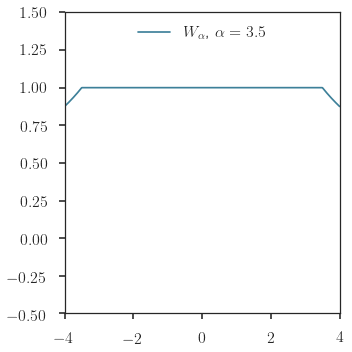

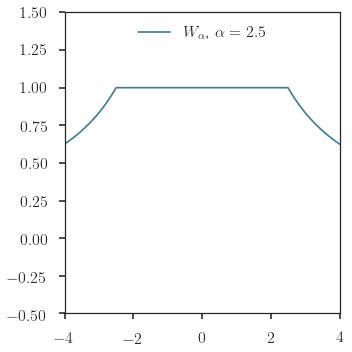

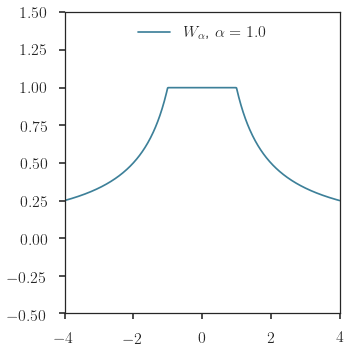

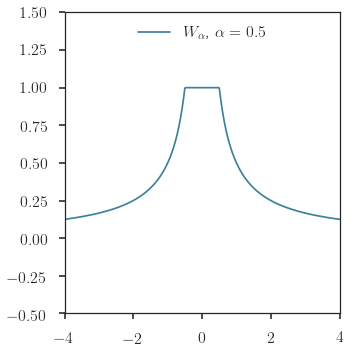

In [12]:
plot_data_statistics(x, huber_weights, 3.5, "Huber_weights3pt5",
                     ylims=[-0.5, 1.5], derivate=True,name=r'$W_\alpha$,')
plot_data_statistics(x, huber_weights, 2.5, "Huber_weights2pt5",
                     ylims=[-0.5, 1.5], derivate=True, name=r'$W_\alpha$,')
plot_data_statistics(x, huber_weights, 1.0, "Huber_weights1pt0",
                     ylims=[-0.5, 1.5], derivate=True, name=r'$W_\alpha$,')
plot_data_statistics(x, huber_weights, 0.5, "Huber_weights0pt5",
                     ylims=[-0.5, 1.5], derivate=True, name=r'$W_\alpha$,')

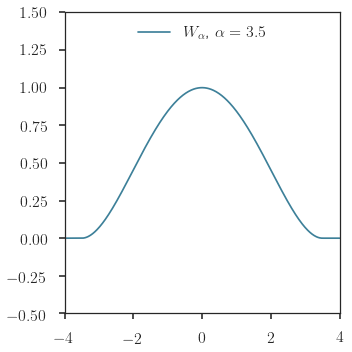

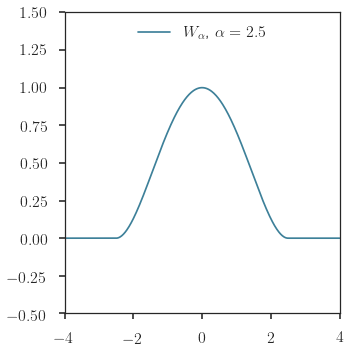

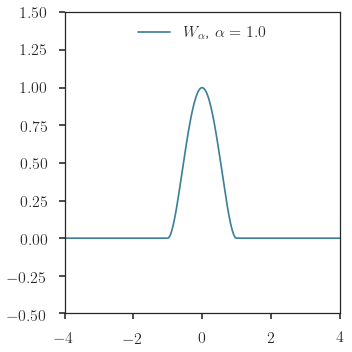

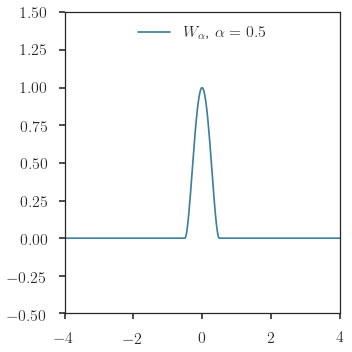

In [13]:
plot_data_statistics(x, bisquare_weights, 3.5, "Bisquare_weights3pt5",
                     ylims=[-0.5, 1.5], derivate=True,name=r'$W_\alpha$,')
plot_data_statistics(x, bisquare_weights, 2.5, "Bisquare_weights2pt5",
                     ylims=[-0.5, 1.5], derivate=True, name=r'$W_\alpha$,')
plot_data_statistics(x, bisquare_weights, 1.0, "Bisquare_weights1pt0",
                     ylims=[-0.5, 1.5], derivate=True, name=r'$W_\alpha$,')
plot_data_statistics(x, bisquare_weights, 0.5, "Bisquare_weights0pt5",
                     ylims=[-0.5, 1.5], derivate=True, name=r'$W_\alpha$,')

# The wors asymptotic corruption of a Gaussian design.

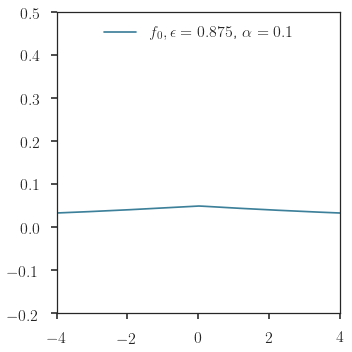

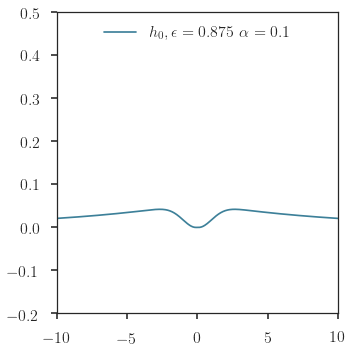

In [14]:
x = np.linspace(-10, 10, 500)
alpha_huber = 0.1
eps_huber = compute_contamination(alpha_huber)
plot_data_statistics(x, optimal_distribution, alpha_huber, "Optimal0pt1",
                     ylims=[-0.2, .5], derivate=True, name=r'$f_0, \epsilon={:.3f}$,'.format(eps_huber))
plot_data_statistics(x, worst_corruption, alpha_huber, "WorstCorruption0pt1",
                     xlims=[-10, 10], ylims=[-0.2, .5], derivate=True, name=r'$h_0, \epsilon={:.3f}$'.format(eps_huber))


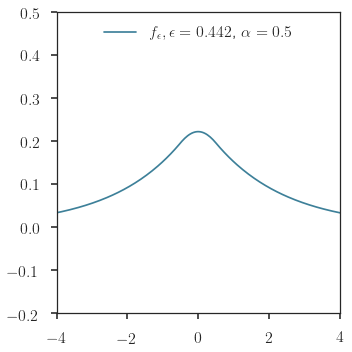

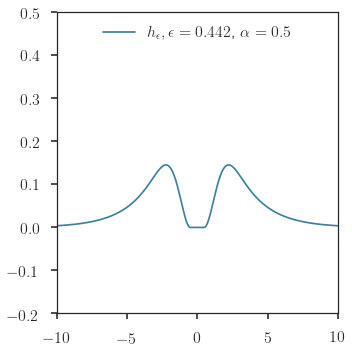

In [15]:
x = np.linspace(-10, 10, 500)
alpha_huber = 0.5
eps_huber = compute_contamination(alpha_huber)
plot_data_statistics(x, optimal_distribution, alpha_huber, "Optimal0pt5",
                     ylims=[-0.2, .5], derivate=True, name=r'$f_\epsilon, \epsilon={:.3f}$,'.format(eps_huber))
plot_data_statistics(x, worst_corruption, alpha_huber, "WorstCorruption0pt5",
                     xlims=[-10, 10], ylims=[-0.2, .5], derivate=True, name=r'$h_\epsilon, \epsilon={:.3f}$,'.format(eps_huber))


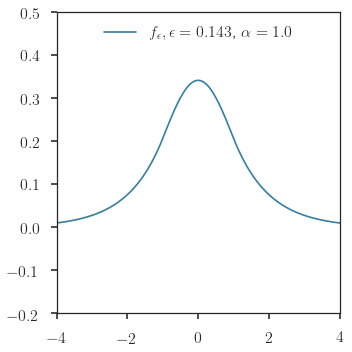

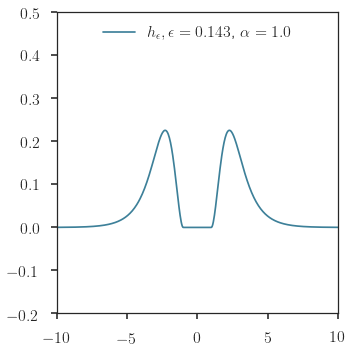

In [16]:
x = np.linspace(-10, 10, 500)
alpha_huber = 1.
eps_huber = compute_contamination(alpha_huber)
plot_data_statistics(x, optimal_distribution, alpha_huber, "Optimal1pt0",
                     ylims=[-0.2, .5], derivate=True, name=r'$f_\epsilon, \epsilon={:.3f}$,'.format(eps_huber))
plot_data_statistics(x, worst_corruption, alpha_huber, "WorstCorruption1pt0",
                     xlims=[-10, 10], ylims=[-0.2, .5], derivate=True, name=r'$h_\epsilon, \epsilon={:.3f}$,'.format(eps_huber))


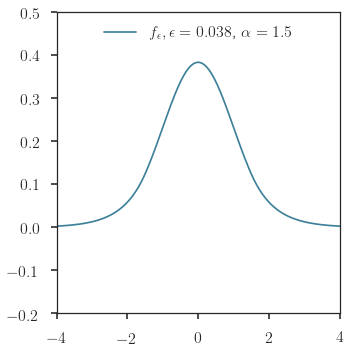

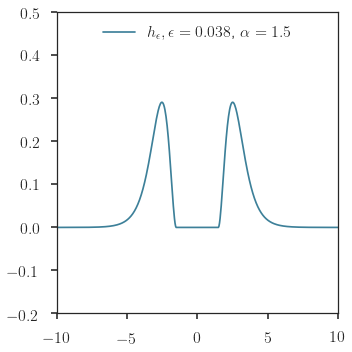

In [17]:
x = np.linspace(-10, 10, 500)
alpha_huber = 1.5
eps_huber = compute_contamination(alpha_huber)
plot_data_statistics(x, optimal_distribution, alpha_huber, "Optimal1pt5",
                     ylims=[-0.2, .5], derivate=True, name=r'$f_\epsilon, \epsilon={:.3f}$,'.format(eps_huber))
plot_data_statistics(x, worst_corruption, alpha_huber, "WorstCorruption1pt5",
                     xlims=[-10, 10], ylims=[-0.2, .5], derivate=True, name=r'$h_\epsilon, \epsilon={:.3f}$,'.format(eps_huber))


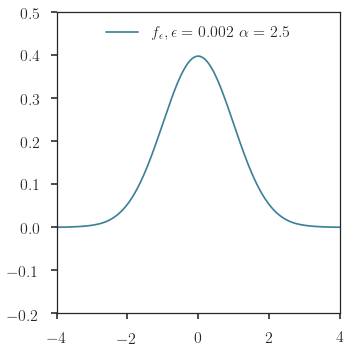

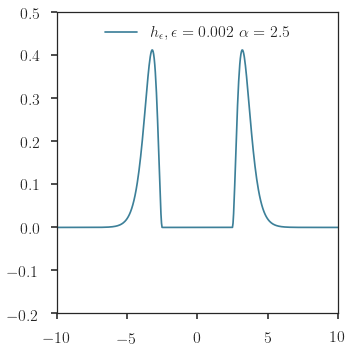

In [18]:
x = np.linspace(-10, 10, 500)
alpha_huber = 2.5
eps_huber = compute_contamination(alpha_huber)
plot_data_statistics(x, optimal_distribution, alpha_huber, "Optimal2pt5",
                     ylims=[-0.2, .5], derivate=True, name=r'$f_\epsilon, \epsilon={:.3f}$'.format(eps_huber))
plot_data_statistics(x, worst_corruption, alpha_huber, "WorstCorruption2pt5",
                     xlims=[-10, 10], ylims=[-0.2, .5], derivate=True, name=r'$h_\epsilon, \epsilon={:.3f}$'.format(eps_huber))
